<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/08_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 ニューラルネットワーク

多層ニューラルネットワークでの識別をKerasでコーディングします。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## データの読み込み

MNISTデータは手描き数字画像認識のためのデータセットです。学習用60000事例、評価用10000事例で、それぞれ28x28の行列で画像が表現されています。

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

パターン行列からデータを1つ取り出して、pyplotで表示します。

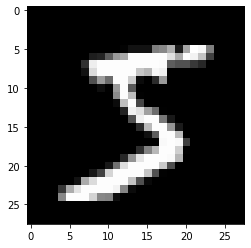

In [4]:
plt.gray()
plt.imshow(X_train[0])

正解ベクトルの最初の20要素程度を表示させて、どのようにデータが並んでいるのかを確認します。

In [5]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

入力は、28x28の行列をフラットな748次元ベクトルに変換します。また、値のとりうる範囲を0-255から0-1に変換します。

In [0]:
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

正解をone-hotベクトルに変換します。

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

3層のフィードフォワード方で学習します。

In [0]:
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
        ])

損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。

In [10]:
model.fit(X_train, y_train, batch_size=200, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.5204 - acc: 0.8648
Epoch 2/3
60000/60000 [==============================] - 4s 58us/step - loss: 0.2699 - acc: 0.9229
Epoch 3/3
60000/60000 [==============================] - 4s 59us/step - loss: 0.2212 - acc: 0.9368


評価用データで評価します。

In [11]:
score = model.evaluate(X_test, y_test)
print("Accuracy: %0.2f" % score[1])

10000/10000 [==============================] - 0s 47us/step
Accuracy: 0.94


## 課題

活性化関数sigmoid、最適化器sgd（最急勾配法）で多階層ネットワークを構成し、勾配消失のために学習が進まないことを確認してください。次に、活性化関数を変更して、学習がうまくできることを確認してください。余力があれば、最適化器入れ替えの効果についても確認してください。